In [204]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [205]:
messages = pd.read_csv('spam.csv')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [206]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [207]:
messages.columns = ['label', 'c1', 'c2', 'c3', 'c4']
messages.head(1)

,label,c1,c2,c3,c4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN


In [208]:
messages.fillna(' ', inplace=True)

In [209]:
messages['text'] = messages['c1']+' '+messages['c2']+' '+messages['c3']+' '+messages['c4']
messages.drop(columns=['c1', 'c2', 'c3', 'c4'], inplace=True)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [210]:
messages.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [211]:
messages.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                       Sorry, I'll call later         30
spam    747    653  Please call our customer service representativ...    4

In [212]:
messages['length'] = messages['text'].apply(len)
messages.head(3)

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",117
1,ham,Ok lar... Joking wif u oni...,35
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,161


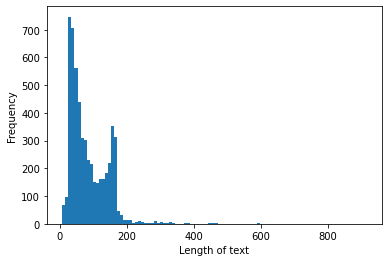

In [213]:
messages['length'].plot.hist(bins=100)
plt.xlabel('Length of text')
plt.show()

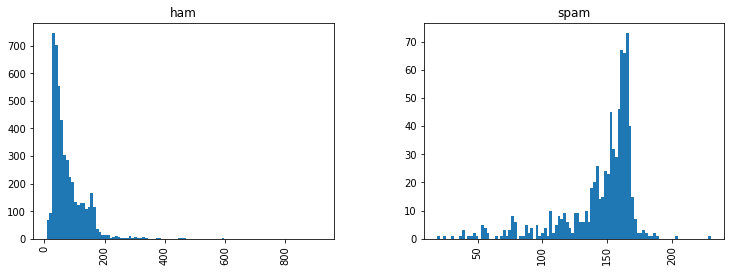

In [214]:
messages.hist(column='length', by='label', bins=100, figsize=(12,4))
plt.show()

In [215]:
ham_msg = messages[messages['label']=='ham']
spam_msg = messages[messages['label']=='spam']

ham_msg_text = " ".join(ham_msg.text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.text.to_numpy().tolist())

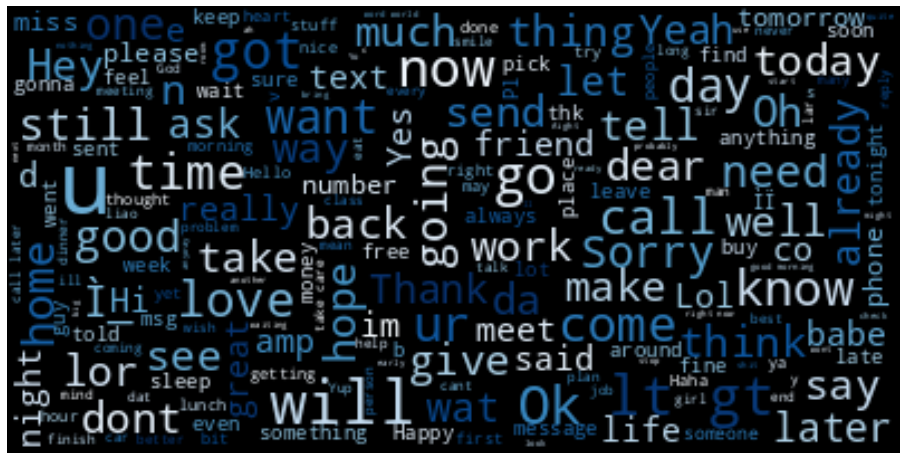

In [216]:
ham_msg_cloud = WordCloud(width=400, height=200, stopwords=STOPWORDS, max_font_size=40, background_color="black",colormap='Blues').generate(ham_msg_text)

plt.figure(figsize=(16, 10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

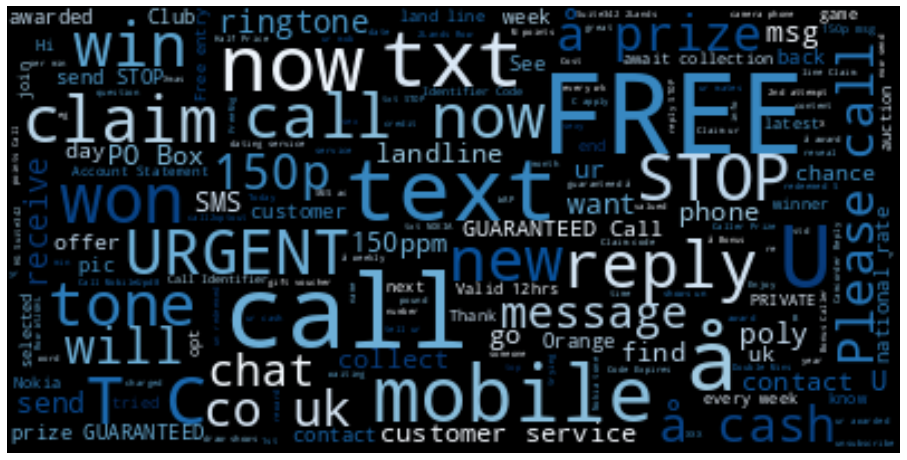

In [217]:
spam_msg_cloud = WordCloud(width =400, height =200, stopwords=STOPWORDS,max_font_size=50, background_color ="black", 
                           colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # not to display
plt.show()

In [218]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [219]:
name = 'Hello! Jhonny this side.'

In [220]:
name = [c for c in name if c not in string.punctuation]
name = ''.join(name)
name

'Hello Jhonny this side'

In [221]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [222]:
name.split()

['Hello', 'Jhonny', 'this', 'side']

In [223]:
clean_text = [word for word in name.split() if word.lower() not in stopwords.words('english')]
clean_text

['Hello', 'Jhonny', 'side']

In [224]:
def text_cleaning(data):
    nopunc = [char for char in data if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 

In [225]:
messages.iloc[:3, 1].apply(text_cleaning)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: text, dtype: object

In [226]:
transformer1 = CountVectorizer(analyzer=text_cleaning).fit(messages['text'])

In [227]:
len(transformer1.vocabulary_)

11426

In [228]:
a = messages['text'][1]
a

'Ok lar... Joking wif u oni...      '

In [229]:
b = transformer1.transform([a])
print(b)

  (0, 2455)	1
  (0, 3068)	1
  (0, 7703)	1
  (0, 8591)	1
  (0, 10698)	1
  (0, 11073)	1


In [230]:
print(b.shape)

(1, 11426)


In [231]:
transformer1.get_feature_names()[3068]

'Ok'

In [232]:
transformed = transformer1.transform(messages['text'])
transformed.shape

(5572, 11426)

In [233]:
print('Sparcity:', 1-(100.0 * transformed.nnz/(transformed.shape[0]*transformed.shape[1])))

Sparcity: 0.9205945709643967


In [234]:
tfidf_transformer = TfidfTransformer().fit(transformed)
transformed2 = tfidf_transformer.transform(b)

In [235]:
print(transformed2)

  (0, 11073)	0.40061560982443056
  (0, 10698)	0.2063637481323008
  (0, 8591)	0.5043405901305854
  (0, 7703)	0.3767401070812794
  (0, 3068)	0.2911995411244838
  (0, 2455)	0.561988811929381


In [236]:
message_tfidf = tfidf_transformer.transform(transformed)

In [237]:
nb = MultinomialNB()
nb.fit(message_tfidf, messages['label'])

MultinomialNB()

In [238]:
nb.predict(transformed2)

array(['ham'], dtype='<U4')

In [239]:
messages['label'][1]

'ham'

In [240]:
train_x, test_x, train_y, test_y = train_test_split(messages['text'], messages['label'], test_size=0.3, random_state=25)

In [241]:
pipelinenb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [242]:
pipelinenb.fit(train_x, train_y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fb96d954790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [243]:
prednb = pipelinenb.predict(test_x)

In [244]:
print(classification_report(test_y, prednb))
print('--------------------------------')
print('Accuracy Score ', accuracy_score(test_y, prednb))
print('--------------------------------')
print('Balanced Accuracy Score ', balanced_accuracy_score(test_y, prednb))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1429
        spam       1.00      0.68      0.81       243

    accuracy                           0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672

--------------------------------
Accuracy Score  0.9539473684210527
--------------------------------
Balanced Accuracy Score  0.8415637860082305


In [245]:
pipelinesvc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

In [246]:
pipelinesvc.fit(train_x, train_y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fb96d954790>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [247]:
predsvc = pipelinesvc.predict(test_x)

In [248]:
print(classification_report(test_y, predsvc))
print('--------------------------------')
print('Accuracy Score ', accuracy_score(test_y, predsvc))
print('--------------------------------')
print('Balanced Accuracy Score ', balanced_accuracy_score(test_y, predsvc))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1429
        spam       1.00      0.76      0.86       243

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672

--------------------------------
Accuracy Score  0.965311004784689
--------------------------------
Balanced Accuracy Score  0.8806584362139918


In [249]:
pipelinerf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [250]:
pipelinerf.fit(train_x, train_y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fb96d954790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [251]:
predrf = pipelinerf.predict(test_x)

In [252]:
print(classification_report(test_y, predrf))
print('--------------------------------')
print('Accuracy Score ', accuracy_score(test_y, predrf))
print('--------------------------------')
print('Balanced Accuracy Score ', balanced_accuracy_score(test_y, predrf))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1429
        spam       1.00      0.76      0.86       243

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672

--------------------------------
Accuracy Score  0.965311004784689
--------------------------------
Balanced Accuracy Score  0.8806584362139918


In [253]:
print("Comparison Study for the three algorithm:")
print("Accuracy of SVC: ",accuracy_score(test_y, predsvc))
print("Accuracy of Multinomial Naive Bayes: ",accuracy_score(test_y, prednb))
print("Accuracy of Random Forest: ",accuracy_score(test_y, predsvc))


Comparison Study for the three algorithm:
Accuracy of SVC:  0.965311004784689
Accuracy of Multinomial Naive Bayes:  0.9539473684210527
Accuracy of Random Forest:  0.965311004784689


In [254]:
import joblib
joblib.dump(pipelinerf, 'best_model.joblib')

['best_model.joblib']

In [259]:
model = joblib.load('best_model.joblib')
model.predict(['Hi, my name is Sharan'])

array(['ham'], dtype=object)